In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
src = cv2.imread('./data/people.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

In [9]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #64 * 128 train
# hog.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector()) #48 * 96 train

In [11]:
loc1, weight1 = hog.detect(src) #loc1 : 위치, weight1 : 사람일확률 (위치 당 확률)
print(len(loc1)) #실제 사람은 64*128 크기(train data)가 아니라 0이 나옴

0


In [12]:
dst2 = src.copy()
loc2, weight2 = hog.detectMultiScale(src) #입력 영상을 여러 크기로..
print(len(loc2))

3


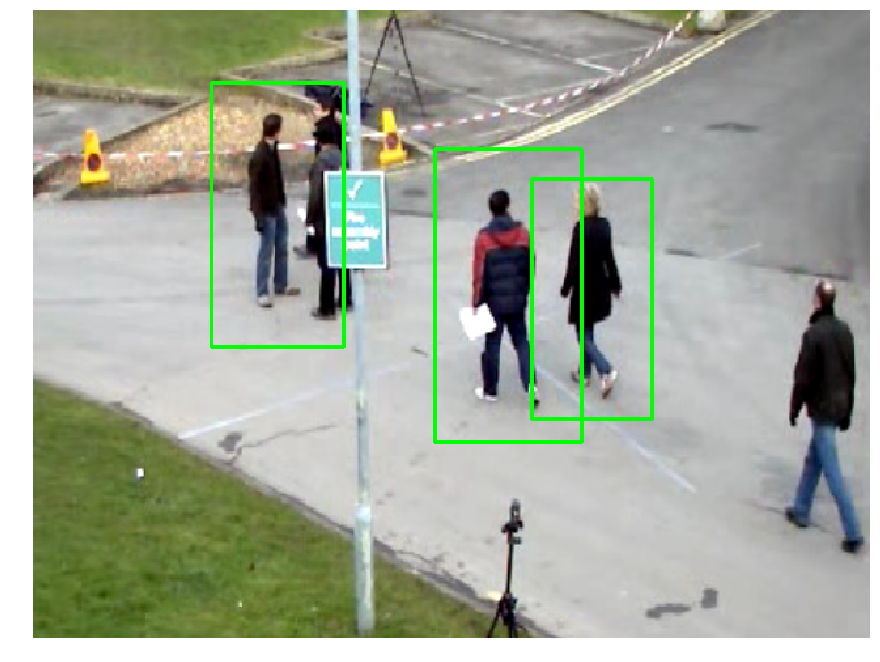

In [14]:
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15, 20)) #범위
plt.axis('off')
plt.imshow(dst2_rgb)
plt.show()

6


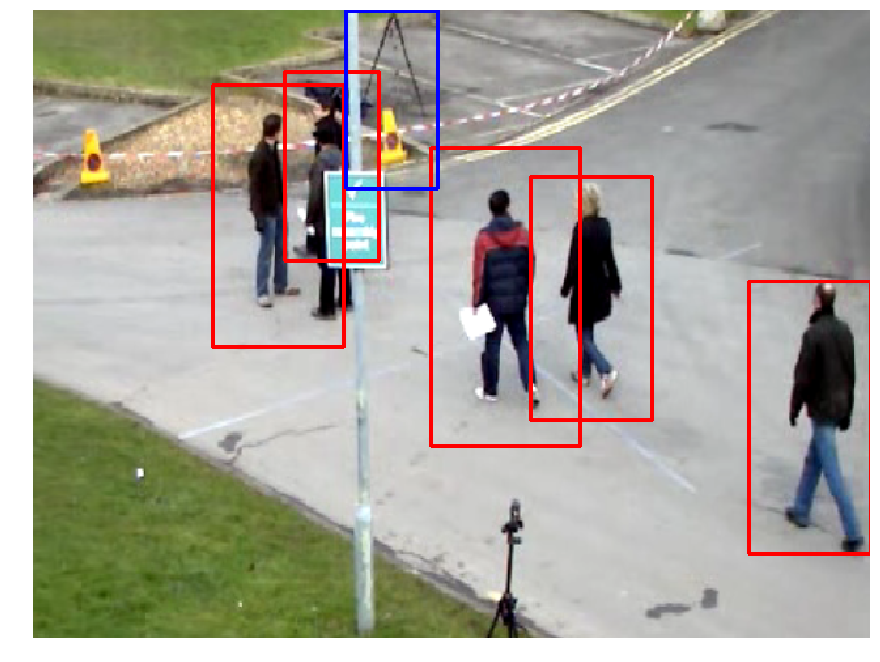

In [16]:
dst3 = src.copy()
loc3, weight3 = hog.detectMultiScale(src, winStride = (1, 1), padding = (8, 8)) #winStride : 촘촘 / padding : 덧붙임?
#스케일링 단점 : 가장자리에 잘린 사람 찾기 어려움
print(len(loc3))

for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weight3[i] > .5:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (0, 0, 255), 2) #사람을 빨갛게
    else:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (255, 0, 0), 2) #컨피던스 낮음
        
    
dst3_rgb = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15, 20)) #범위
plt.axis('off')
plt.imshow(dst3_rgb)
plt.show()